In [223]:
import pyrootutils
import os
import hydra
from hydra import initialize, initialize_config_module, initialize_config_dir, compose
from omegaconf import OmegaConf, DictConfig
from hydra.core.hydra_config import HydraConfig

import pathlib
root = pyrootutils.setup_root(os.path.abspath(''), dotenv=True, pythonpath=True)

from src.train import main
from src.tasks.train_task import train
from src.utils import get_metric_value

In [224]:
from IPython.display import HTML
HTML('''<script>
code_show_err=false; 
function code_toggle_err() {
 if (code_show_err){
 $('div.output_stderr').hide();
 } else {
 $('div.output_stderr').show();
 }
 code_show_err = !code_show_err
} 
$( document ).ready(code_toggle_err);
</script>
To toggle on/off output_stderr, click <a href="javascript:code_toggle_err()">here</a>.''')

In [225]:
import pandas as pd
import numpy as np
import json
import networkx as nx
import matplotlib.pylab as plt
import textwrap

from src.models.components.DAG_utils import get_graph_figure, fig2img

In [226]:
with open(r"/home/sj/Projects/Causal-Discovery/Pytorch-Lightning/workspace/DAG_GNN_lightning/train_epoch300_iter100_2.json", "r") as read_file:
    data = json.load(read_file)

df = pd.DataFrame(data)
gt_df = df[df.G_type == "gt"]
df = df[df.G_type != "gt"]
df.head(44)

,G_type,iter,E_type,node,in_degree,out_degree
44,shd,0,Graph,praf,5,9
45,shd,0,Graph,pmek,6,4
46,shd,0,Graph,plcg,9,6
47,shd,0,Graph,PIP2,7,10
48,shd,0,Graph,PIP3,9,7
49,shd,0,Graph,p44/42,8,6
50,shd,0,Graph,pakts473,8,8
51,shd,0,Graph,PKA,8,9
52,shd,0,Graph,PKC,6,8
53,shd,0,Graph,P38,9,6


In [227]:
G_type = ["shd", "tpr", "loss", "last"]
iter = [i for i in range(14)]
E_type = ["Graph", "Correct", "Reversed", "Wrong"]
node = ["praf", "pmek", "plcg", "PIP2", "PIP3", "p44/42", "pakts473", "PKA", "PKC", "P38", "pjnk"]

index = pd.MultiIndex.from_product([G_type, E_type, node, iter], names=['G_type', 'E_type', 'node', 'iter'])
index

MultiIndex([( 'shd', 'Graph', 'praf',  0),
            ( 'shd', 'Graph', 'praf',  1),
            ( 'shd', 'Graph', 'praf',  2),
            ( 'shd', 'Graph', 'praf',  3),
            ( 'shd', 'Graph', 'praf',  4),
            ( 'shd', 'Graph', 'praf',  5),
            ( 'shd', 'Graph', 'praf',  6),
            ( 'shd', 'Graph', 'praf',  7),
            ( 'shd', 'Graph', 'praf',  8),
            ( 'shd', 'Graph', 'praf',  9),
            ...
            ('last', 'Wrong', 'pjnk',  4),
            ('last', 'Wrong', 'pjnk',  5),
            ('last', 'Wrong', 'pjnk',  6),
            ('last', 'Wrong', 'pjnk',  7),
            ('last', 'Wrong', 'pjnk',  8),
            ('last', 'Wrong', 'pjnk',  9),
            ('last', 'Wrong', 'pjnk', 10),
            ('last', 'Wrong', 'pjnk', 11),
            ('last', 'Wrong', 'pjnk', 12),
            ('last', 'Wrong', 'pjnk', 13)],
           names=['G_type', 'E_type', 'node', 'iter'], length=2464)

In [228]:
# gt_index = pd.MultiIndex.from_product([["gt"], E_type, node, ["0"]], names=['G_type', 'E_type', 'node', 'iter'])
# mult_gt_df = gt_df.set_index(gt_index)
gt_Graph_df = gt_df.loc[gt_df["E_type"] == "Graph"]
gt_Graph_df

,G_type,iter,E_type,node,in_degree,out_degree
0,gt,0,Graph,praf,2,1
1,gt,0,Graph,pmek,3,1
2,gt,0,Graph,plcg,0,3
3,gt,0,Graph,PIP2,2,1
4,gt,0,Graph,PIP3,1,2
5,gt,0,Graph,p44/42,2,1
6,gt,0,Graph,pakts473,3,0
7,gt,0,Graph,PKA,1,6
8,gt,0,Graph,PKC,2,5
9,gt,0,Graph,P38,2,0


In [229]:
def get_gt_in_out_degree(df, expr_node):
    expr = f"G_type == 'gt' and E_type == 'Graph' and node == '{expr_node}'"
    gt_df_q = df.query(expr)
    gt_in_degree, gt_out_degree = gt_df_q[["in_degree", "out_degree"]].values[0]
    return gt_in_degree, gt_out_degree

gt_in_degree, gt_out_degree = get_gt_in_out_degree(gt_Graph_df, expr_node="pmek")
print(gt_in_degree, gt_out_degree)

3 1


In [230]:
# reindex to multiindex
mult_df = df.set_index(index)
mult_df.drop(columns=["G_type", "E_type", "node", "iter"], inplace=True)

# convert in, out degrees to int
mult_df["in_degree"] = mult_df["in_degree"].astype(int)
mult_df["out_degree"] = mult_df["out_degree"].astype(int)

# # devide in, out degrees by gt's in, out degrees
# for idx, row in mult_df.iterrows():
#     expr_node = idx[2]
#     gt_in_degree, gt_out_degree = get_gt_in_out_degree(gt_Graph_df, expr_node)
#     # TODO: What to do if in, out degree is 0?
#     # solution1(current): add 1 to gt's in, out degree
#     mult_df.at[idx, "in_degree"] = (row["in_degree"] + 1) / (gt_in_degree + 1)
#     mult_df.at[idx, "out_degree"] = (row["out_degree"] + 1) / (gt_out_degree + 1)

# check in, out degree's change
mult_df["in_change"] = mult_df.groupby(["G_type", "E_type", "node"])["in_degree"].diff()
mult_df["out_change"] = mult_df.groupby(["G_type", "E_type", "node"])["out_degree"].diff()

# sum in, out degree
mult_df["degree_sum"] = mult_df[["in_degree", "out_degree"]].sum(axis=1)
mult_df["change_sum"] = mult_df[["in_change", "out_change"]].sum(axis=1)

# fill first in, out degree's change as 0
mult_df["in_change"] = mult_df["in_change"].fillna(0)
mult_df["out_change"] = mult_df["out_change"].fillna(0)

mult_df.head(44)

in_degree  out_degree  in_change  out_change  \
G_type E_type node iter                                                 
shd    Graph  praf 0             5           9        0.0         0.0   
                   1             6           4        1.0        -5.0   
                   2             9           6        3.0         2.0   
                   3             7          10       -2.0         4.0   
                   4             9           7        2.0        -3.0   
                   5             8           6       -1.0        -1.0   
                   6             8           8        0.0         2.0   
                   7             8           9        0.0         1.0   
                   8             6           8       -2.0        -1.0   
                   9             9           6        3.0        -2.0   
                   10            6           8       -3.0         2.0   
                   11            2           1       -4.0        -7.0   
                   12            1           1       -1.0         0.0   
                   13            0           1       -1.0         0.0   
              pmek 0             1           1        0.0         0.0   
                   1             1           1        0.0         0.0   
                   2             2           1        1.0         0.0   
                   3             2           0        0.0        -1.0   
                   4             1           5       -1.0         5.0   
                   5             1           3        0.0        -2.0   
                   6             2           0        1.0        -3.0   
                   7             1           0       -1.0         0.0   
                   8             2           0        1.0         0.0   
                   9             0           1       -2.0         1.0   
                   10            0           3        0.0         2.0   
                   11            2           1        2.0        -2.0   
                   12            1           2       -1.0         1.0   
                   13            2           1        1.0        -1.0   
              plcg 0             2           0        0.0         0.0   
                   1             0           3       -2.0         3.0   
                   2             2           2        2.0        -1.0   
                   3             1           0       -1.0        -2.0   
                   4             1           0        0.0         0.0   
                   5             3           8        2.0         8.0   
                   6             5           3        2.0        -5.0   
                   7             9           5        4.0         2.0   
                   8             6           9       -3.0         4.0   
                   9             8           6        2.0        -3.0   
                   10            6           5       -2.0        -1.0   
                   11            6           8        0.0         3.0   
                   12            7           4        1.0        -4.0   
                   13            5           5       -2.0         1.0   
              PIP2 0             7           6        0.0         0.0   
                   1             5           8       -2.0         2.0   

                         degree_sum  change_sum  
G_type E_type node iter                          
shd    Graph  praf 0             14         0.0  
                   1             10        -4.0  
                   2             15         5.0  
                   3             17         2.0  
                   4             16        -1.0  
                   5             14        -2.0  
                   6             16         2.0  
                   7             17         1.0  
                   8             14        -3.0  
                   9             15         1.0  
                   10            14        -1.0  
                

In [231]:
def dfsGnEnN2Graph(df: pd.DataFrame,
                   G_type: str,
                   E_type: str,
                   node: str,
                   draw_change: bool = False,
                   do_sum: bool = True,
                   fig_size: tuple = (8, 5)):
    change=("in_degree", "out_degree", "degree_sum")
    if draw_change:
        change=("in_change", "out_change", "change_sum")
    if not do_sum:
        change = change[:2]
        
    G_df = df.loc[(G_type, E_type, node), change]
    
    f, ax = plt.subplots(figsize = fig_size)
    G_df.plot(grid=True, figsize=fig_size, title=f"{G_type}_{E_type}_{node}", ax=ax)
    return f, ax

In [232]:
print(G_type, E_type, node)

['shd', 'tpr', 'loss', 'last'] ['Graph', 'Correct', 'Reversed', 'Wrong'] ['praf', 'pmek', 'plcg', 'PIP2', 'PIP3', 'p44/42', 'pakts473', 'PKA', 'PKC', 'P38', 'pjnk']


In [233]:
f, ax = dfsGnEnN2Graph(mult_df, G_type='shd', E_type='Graph', node='praf', draw_change=False, do_sum=True)
plt.close(f)
f, ax = dfsGnEnN2Graph(mult_df, G_type='shd', E_type='Correct', node='praf', draw_change=False, do_sum=True)
plt.close(f)
f, ax = dfsGnEnN2Graph(mult_df, G_type='shd', E_type='Wrong', node='praf', draw_change=False, do_sum=True)
plt.close(f)

/tmp/ipykernel_111045/2460682643.py:14: PerformanceWarning: indexing past lexsort depth may impact performance.
  G_df = df.loc[(G_type, E_type, node), change]
/tmp/ipykernel_111045/2460682643.py:14: PerformanceWarning: indexing past lexsort depth may impact performance.
  G_df = df.loc[(G_type, E_type, node), change]
/tmp/ipykernel_111045/2460682643.py:14: PerformanceWarning: indexing past lexsort depth may impact performance.
  G_df = df.loc[(G_type, E_type, node), change]


In [234]:
for g in ["shd"]:
    for e in E_type:
        for n in node:
            f, ax = dfsGnEnN2Graph(mult_df, G_type=g, E_type=e, node=n, draw_change=False, do_sum=True)
            n = n.replace("/", "")
            f.savefig(f"./plots2/epoch300_iter100_{g}_{e}_{n}.png")
            plt.close(f)

/tmp/ipykernel_111045/2460682643.py:14: PerformanceWarning: indexing past lexsort depth may impact performance.
  G_df = df.loc[(G_type, E_type, node), change]
/tmp/ipykernel_111045/2460682643.py:14: PerformanceWarning: indexing past lexsort depth may impact performance.
  G_df = df.loc[(G_type, E_type, node), change]
/tmp/ipykernel_111045/2460682643.py:14: PerformanceWarning: indexing past lexsort depth may impact performance.
  G_df = df.loc[(G_type, E_type, node), change]
/tmp/ipykernel_111045/2460682643.py:14: PerformanceWarning: indexing past lexsort depth may impact performance.
  G_df = df.loc[(G_type, E_type, node), change]
/tmp/ipykernel_111045/2460682643.py:14: PerformanceWarning: indexing past lexsort depth may impact performance.
  G_df = df.loc[(G_type, E_type, node), change]
/tmp/ipykernel_111045/2460682643.py:14: PerformanceWarning: indexing past lexsort depth may impact performance.
  G_df = df.loc[(G_type, E_type, node), change]
/tmp/ipykernel_111045/2460682643.py:14: 

In [235]:
def dfsGnE2Graph(df: pd.DataFrame, 
                 G_type: str, 
                 E_type: str, 
                 draw_change: bool=False, 
                 do_sum: bool=True,
                 fig_size: tuple=(15, 5)):
    """Create graph from df's G_type, E_type

    Args:
        df (pd.DataFrame): _description_
        G_type (str): _description_
        E_type (str): _description_
        draw_change (bool, optional): _description_. Defaults to False.
        do_sum (bool, optional): _description_. Defaults to True.
        fig_size (tuple, optional): _description_. Defaults to (15, 5).

    Returns:
        _type_: _description_
    """
    change=("in_degree", "out_degree", "degree_sum")
    if draw_change:
        change=("in_change", "out_change", "change_sum")
    if not do_sum:
        change = change[:2]
        
    G_df = df.loc[(G_type, E_type), change]
    
    f, ax = plt.subplots(figsize = fig_size)
    G_df.plot(grid=True, figsize=fig_size, title=G_type + "_" + E_type, xticks=range(0, 110, 10), ax=ax)
    return ax

/tmp/ipykernel_111045/634573135.py:26: PerformanceWarning: indexing past lexsort depth may impact performance.
  G_df = df.loc[(G_type, E_type), change]
/tmp/ipykernel_111045/634573135.py:26: PerformanceWarning: indexing past lexsort depth may impact performance.
  G_df = df.loc[(G_type, E_type), change]
/tmp/ipykernel_111045/634573135.py:26: PerformanceWarning: indexing past lexsort depth may impact performance.
  G_df = df.loc[(G_type, E_type), change]
/tmp/ipykernel_111045/634573135.py:26: PerformanceWarning: indexing past lexsort depth may impact performance.
  G_df = df.loc[(G_type, E_type), change]


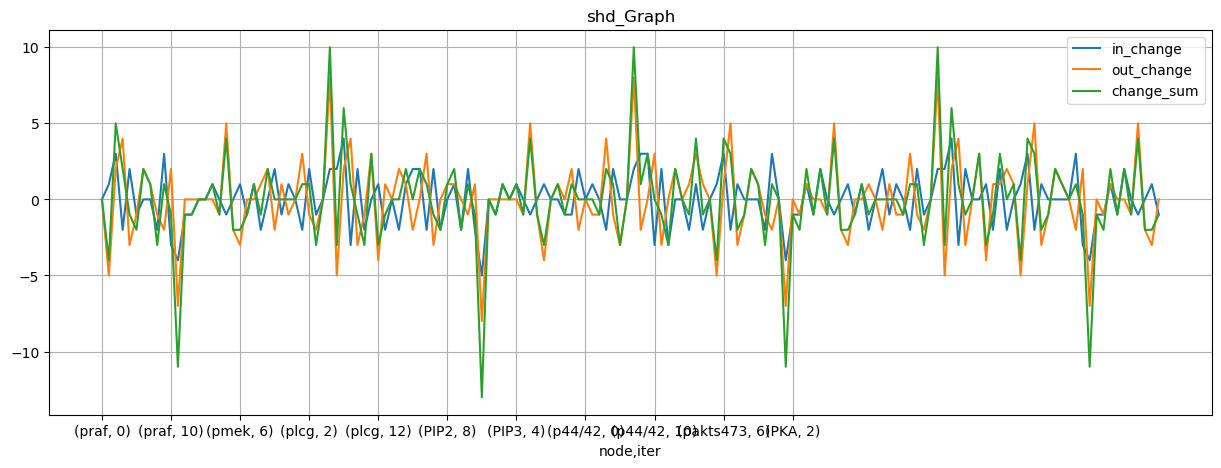

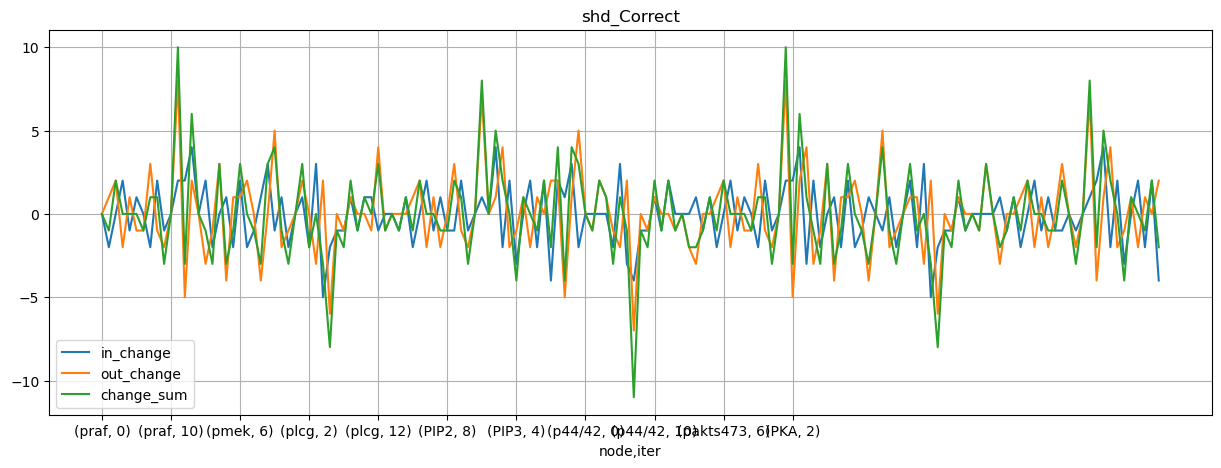

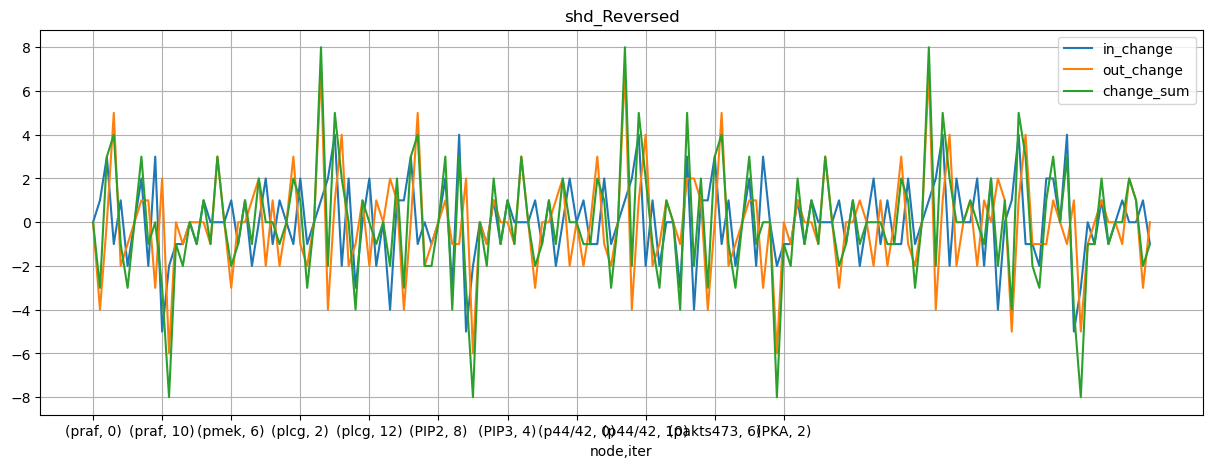

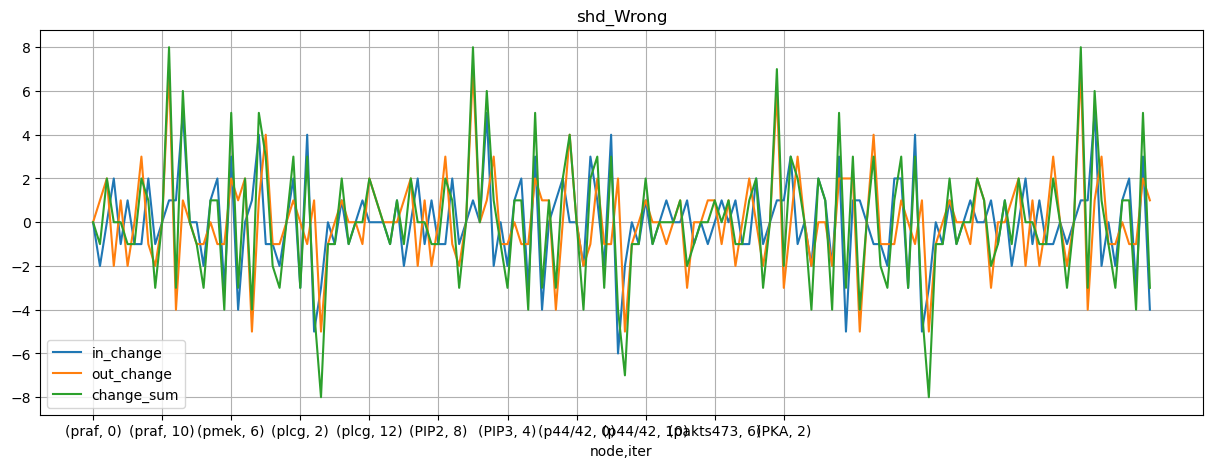

In [236]:
ax = dfsGnE2Graph(mult_df, "shd", "Graph", draw_change=True)
ax = dfsGnE2Graph(mult_df, "shd", "Correct", draw_change=True)
ax = dfsGnE2Graph(mult_df, "shd", "Reversed", draw_change=True)
ax = dfsGnE2Graph(mult_df, "shd", "Wrong", draw_change=True)
plt.show()

/tmp/ipykernel_111045/634573135.py:26: PerformanceWarning: indexing past lexsort depth may impact performance.
  G_df = df.loc[(G_type, E_type), change]
/tmp/ipykernel_111045/634573135.py:26: PerformanceWarning: indexing past lexsort depth may impact performance.
  G_df = df.loc[(G_type, E_type), change]
/tmp/ipykernel_111045/634573135.py:26: PerformanceWarning: indexing past lexsort depth may impact performance.
  G_df = df.loc[(G_type, E_type), change]
/tmp/ipykernel_111045/634573135.py:26: PerformanceWarning: indexing past lexsort depth may impact performance.
  G_df = df.loc[(G_type, E_type), change]


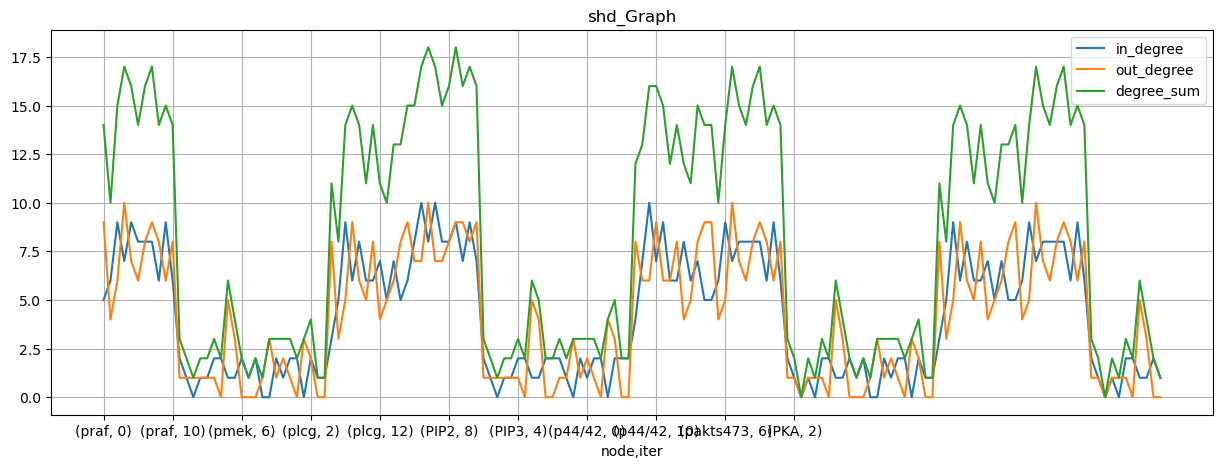

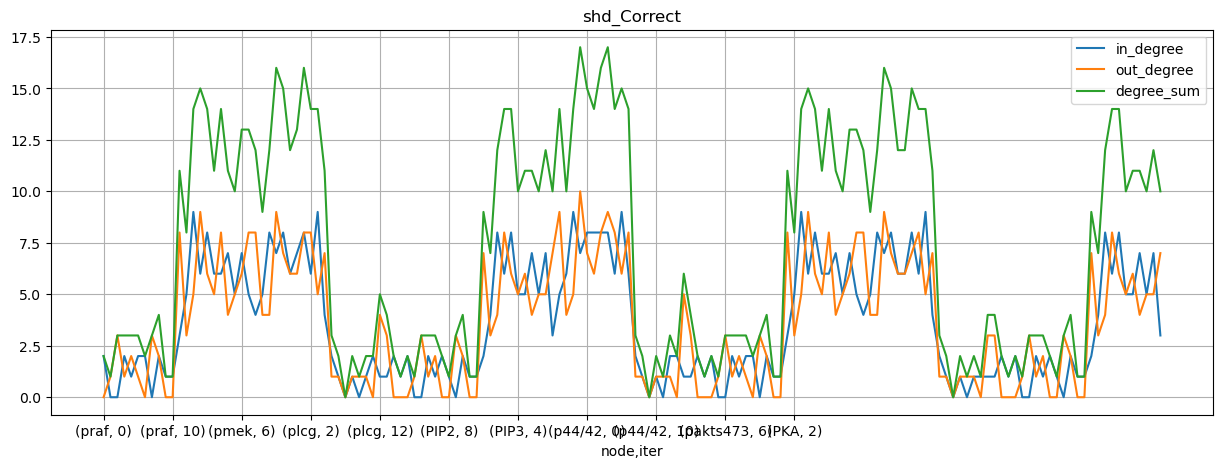

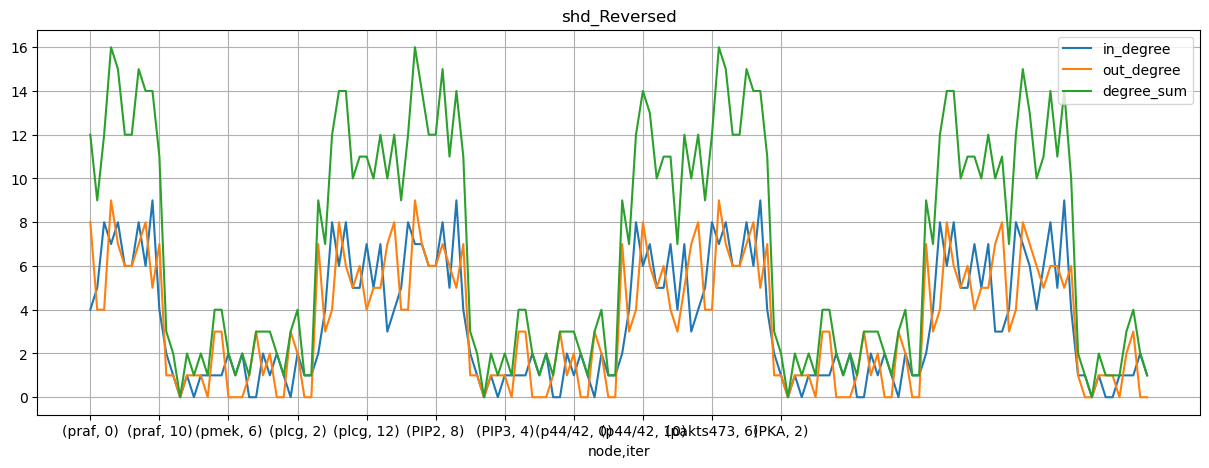

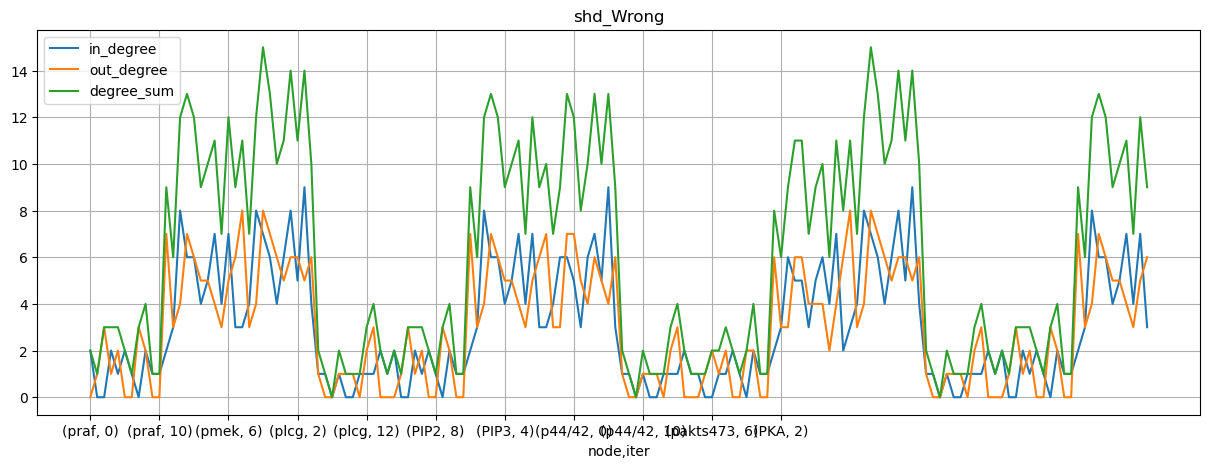

In [237]:
ax = dfsGnE2Graph(mult_df, "shd", "Graph")
ax = dfsGnE2Graph(mult_df, "shd", "Correct")
ax = dfsGnE2Graph(mult_df, "shd", "Reversed")
ax = dfsGnE2Graph(mult_df, "shd", "Wrong")
plt.show()

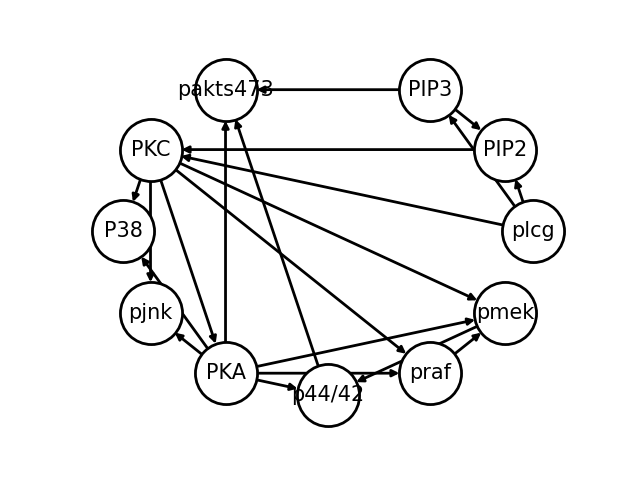

In [238]:
gt_path = "../data/sachs_dataset/sachs_gt_bn.csv"
raw_path = "../data/sachs_dataset/raw/sachs.csv"

adj_cols = pd.read_csv(raw_path, nrows=0).columns
gt_df = pd.read_csv(gt_path, index_col=0)
gt_df = gt_df[adj_cols]
gt_df = gt_df.reindex(adj_cols)
ground_truth_G = nx.from_pandas_adjacency(gt_df, create_using=nx.DiGraph)

figure = get_graph_figure(ground_truth_G, None)
img = fig2img(figure)
img.save('./gt.png',"PNG")
img

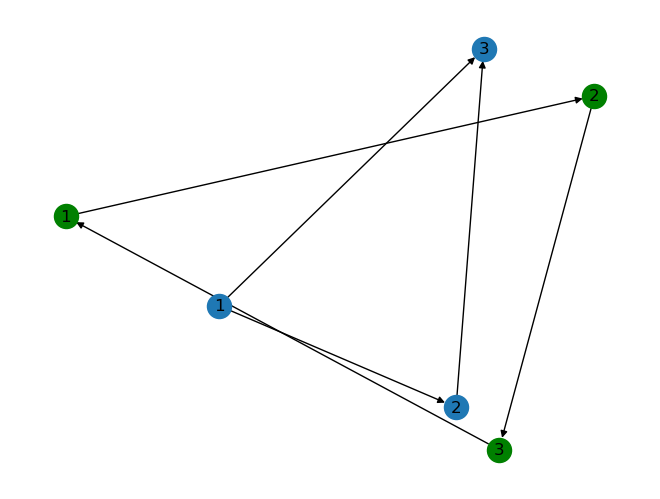

In [239]:
D = nx.DiGraph()
D.add_nodes_from([1, 2, 3])
D.add_edges_from([(1,2),(2,3),(1,3)])
D_gt = nx.DiGraph()
D_gt.add_nodes_from([1, 2, 3])
D_gt.add_edges_from([(1,2),(2,3),(3,1)])
nx.draw(D, with_labels=True)
nx.draw(D_gt, with_labels=True, node_color='g')
I = nx.intersection(D_gt, D) # intersection, correct
R = nx.intersection(D_gt, nx.reverse(D)) # reverse intersection, reversed
C = nx.complement(D_gt) # gt, complement
W = nx.intersection(D, C) # wrong

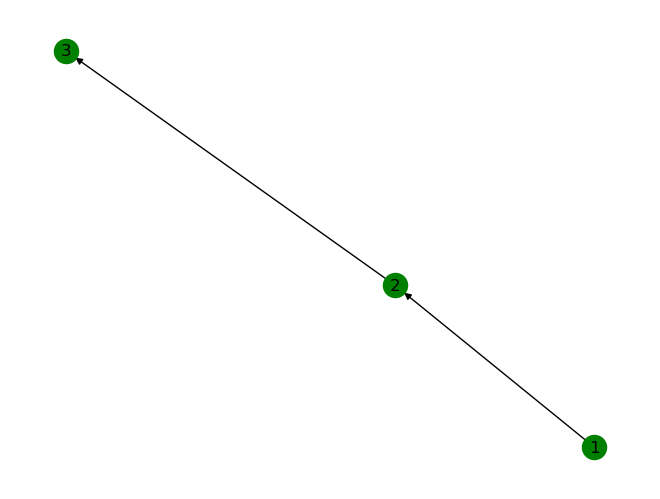

In [240]:
nx.draw(I, with_labels=True, node_color='g')

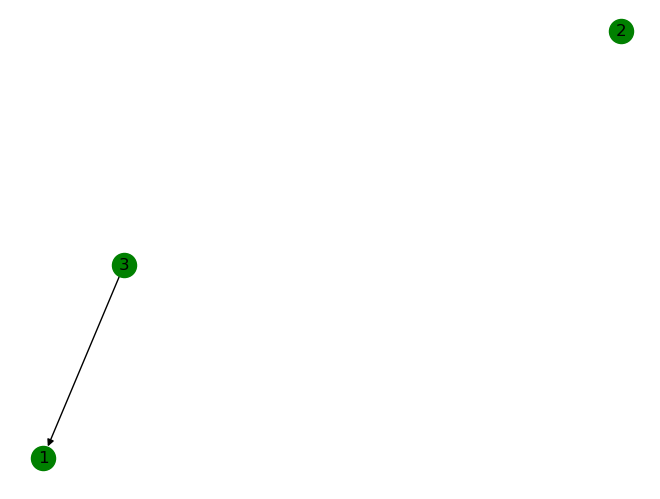

In [241]:
nx.draw(R, with_labels=True, node_color='g')

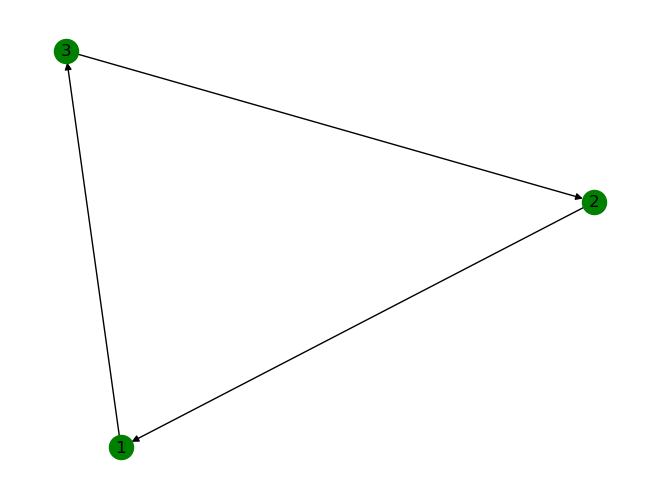

In [242]:
nx.draw(C, with_labels=True, node_color='g')

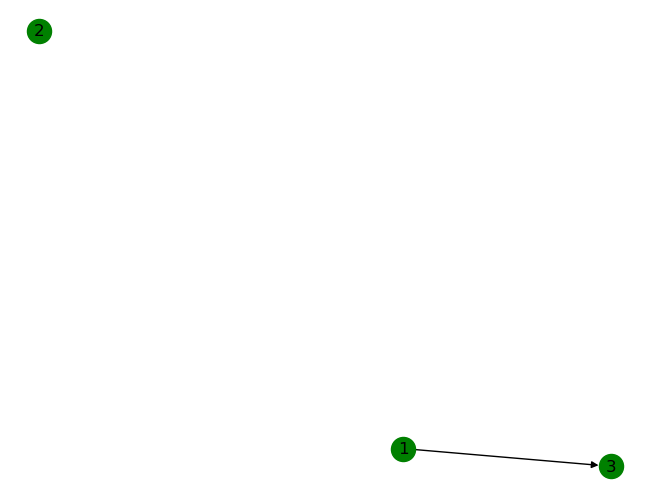

In [243]:
nx.draw(W, with_labels=True, node_color='g')

In [244]:
node_lists = list(D.nodes)
# in degrees
G_in = list(D.in_degree(node_lists))
I_in = list(I.in_degree(node_lists))
R_in = list(R.in_degree(node_lists))
W_in = list(W.in_degree(node_lists))

# out degrees
G_out = list(D.out_degree(node_lists))
I_out = list(I.out_degree(node_lists))
R_out = list(R.out_degree(node_lists))
W_out = list(W.out_degree(node_lists))

print(f"in degree:\n{G_in},\n{I_in},\n{R_in},\n{W_in}")
print(f"out degree:\n{G_out},\n{I_out},\n{R_out},\n{W_out}")
print(list(W.out_degree(node_lists)))
print(W)

in degree:
[(1, 0), (2, 1), (3, 2)],
[(1, 0), (2, 1), (3, 1)],
[(1, 1), (2, 0), (3, 0)],
[(1, 0), (2, 0), (3, 1)]
out degree:
[(1, 2), (2, 1), (3, 0)],
[(1, 1), (2, 1), (3, 0)],
[(1, 0), (2, 0), (3, 1)],
[(1, 1), (2, 0), (3, 0)]
[(1, 1), (2, 0), (3, 0)]
DiGraph with 3 nodes and 1 edges
